# Projeto: Análise de Vendas de Café

## Objetivo
O objetivo deste projeto é analisar os dados de vendas de diferentes tipos de café para entender o comportamento de consumo, identificar os produtos mais populares e explorar padrões relevantes para apoiar decisões estratégicas de marketing e vendas.

- Quais são os cafés mais vendidos em termos de **quantidade** e **faturamento**?
- Como as vendas variam ao longo do tempo (diariamente, mensalmente)?
- Quais são os métodos de pagamento mais usados (**cartão** ou **dinheiro**)?
- Existe sazonalidade ou tendências específicas nas vendas?
- Como o **preço médio dos produtos** varia entre os diferentes tipos de café?

## Dataset
Os dados utilizados neste projeto contêm registros de vendas entre **março de 2024 e março de 2025**. As colunas são:
- `date` e `datetime`: Data e hora da venda
- `cash_type`: Tipo de pagamento (cartão ou dinheiro)
- `money`: Valor da venda
- `coffee_name`: Nome do produto vendido

## Estrutura do Projeto
1. Carregar e explorar os dados
2. Limpar e preparar os dados para análise
3. Análise exploratória focada nos produtos
4. Visualização dos dados e insights
5. Conclusões e possíveis recomendações


In [ ]:
!pip install pandas numpy matplotlib seaborn

In [24]:
# importar pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")



In [33]:
# Carregar os dois arquivos CSV para escolher qual usar
df1 = pd.read_csv('dados-coffee/index_1.csv')
df2 = pd.read_csv('dados-coffee/index_2.csv')

# Visualizar as primeiras linhas de cada um
print("Primeiro arquivo:")
display(df1.head())
display(df1.tail())

print("Segundo arquivo:")
display(df2.head())
display(df2.tail())

Primeiro arquivo:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


,date,datetime,cash_type,card,money,coffee_name
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte


Segundo arquivo:


,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


,date,datetime,cash_type,money,coffee_name
257,2025-03-23,2025-03-23 14:55:46,cash,30.0,Cappuccino
258,2025-03-23,2025-03-23 15:15:36,card,25.0,Irish whiskey
259,2025-03-23,2025-03-23 17:59:25,card,28.0,Super chocolate
260,2025-03-23,2025-03-23 18:01:33,card,28.0,Vanilla with Irish whiskey
261,2025-03-23,2025-03-23 21:23:11,card,29.0,Coffee with Irish whiskey


In [23]:
import pandas as pd
print(pd.__version__)  # só para confirmar versão do pandas

df1.head()       # escolhi este que possui mais dados

2.2.3


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [26]:
# Ver as informações gerais do DataFrame: colunas, tipos e valores nulos
df1.info()

# Verificar se tem valores nulos em cada coluna
df1.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [27]:
# Converter colunas date e datetime para datetime do pandas
df1['date'] = pd.to_datetime(df1['date'])
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Conferir as mudanças
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 170.6+ KB


In [34]:
# ver quais são os cafés diferentes e quantas vendas tem de cada um
# Contar número de vendas por tipo de café
vendas_por_cafe = df1['coffee_name'].value_counts().sort_values(ascending=False)

# Mostrar o resultado
print(vendas_por_cafe)



coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64


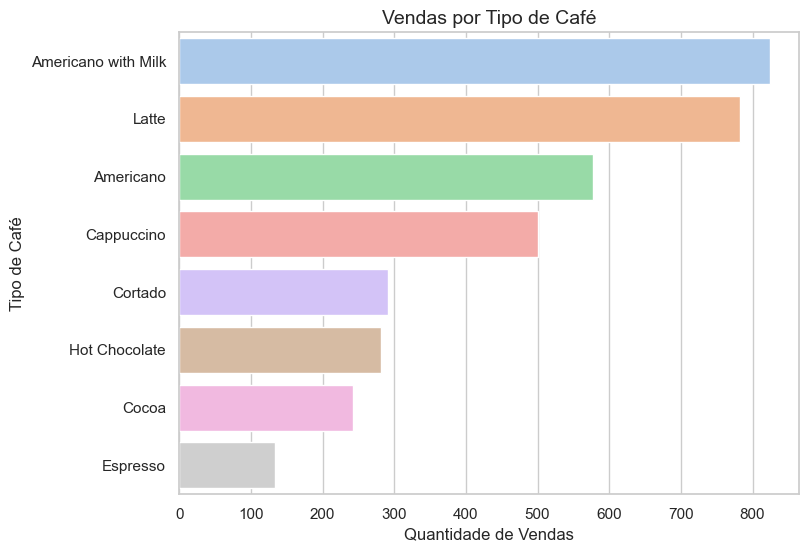

In [30]:
# visualizar isso em um gráfico
# Importar biblioteca de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criar gráfico de barras
sns.barplot(x=vendas_por_cafe.values, 
            y=vendas_por_cafe.index, 
            hue=vendas_por_cafe.index,
            palette='pastel',
            legend=False)

# Título e rótulos
plt.title('Vendas por Tipo de Café', fontsize=14)
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Tipo de Café')

# Mostrar gráfico
plt.show()


In [35]:
# análise de faturamento por tipo de café
# Agrupar o total de dinheiro (money) por tipo de café
faturamento_por_cafe = df1.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Exibir os dados
print(faturamento_por_cafe)

coffee_name
Latte                  27866.30
Americano with Milk    25269.12
Cappuccino             18034.14
Americano              15062.26
Hot Chocolate          10172.46
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Name: money, dtype: float64


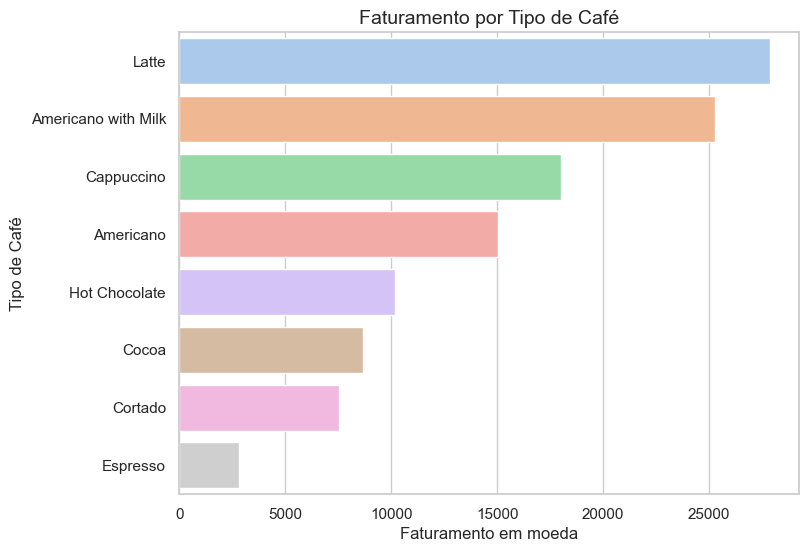

In [36]:
# Gráfico de faturamento por tipo de café
plt.figure(figsize=(8, 6))

sns.barplot(
    x=faturamento_por_cafe.values,
    y=faturamento_por_cafe.index,
    hue=faturamento_por_cafe.index,
    palette='pastel',
    legend=False
)

plt.title('Faturamento por Tipo de Café', fontsize=14)
plt.xlabel('Faturamento em moeda')
plt.ylabel('Tipo de Café')

plt.show()

## Análise de Produto - Vendas de Café

Nesta primeira etapa da análise, o foco foi entender o comportamento de venda dos diferentes tipos de cafés. Foram analisadas tanto a quantidade de vendas por tipo de café quanto o faturamento gerado por cada um.

### Quantidade de vendas por produto

Os cafés mais vendidos no período foram:

- **Americano with Milk** – 824 unidades vendidas
- **Latte** – 782 unidades vendidas
- **Americano** – 578 unidades vendidas
- **Cappuccino** – 501 unidades vendidas
- **Cortado** – 292 unidades vendidas
- **Hot Chocolate** – 282 unidades vendidas
- **Cocoa** – 243 unidades vendidas
- **Espresso** – 134 unidades vendidas

Percebe-se que bebidas como *Americano with Milk*, *Latte* e *Americano* estão entre as mais populares, o que pode indicar preferência dos clientes por bebidas mais tradicionais e, possivelmente, de preço mais acessível.

### Faturamento por produto

Quando analisamos o faturamento, é possível observar que os produtos mais vendidos nem sempre são os que geram maior receita. Produtos com menor volume de vendas podem ter preços mais altos, impactando diretamente no faturamento.

Essas análises ajudam a entender quais produtos são mais relevantes tanto em volume quanto financeiramente, servindo de base para tomadas de decisão sobre estratégias de vendas, promoções ou ajustes no mix de produtos.


coffee_name
Hot Chocolate          36.072553
Cappuccino             35.996287
Cocoa                  35.712593
Latte                  35.634655
Americano with Milk    30.666408
Americano              26.059273
Cortado                25.804315
Espresso               21.002090
Name: money, dtype: float64


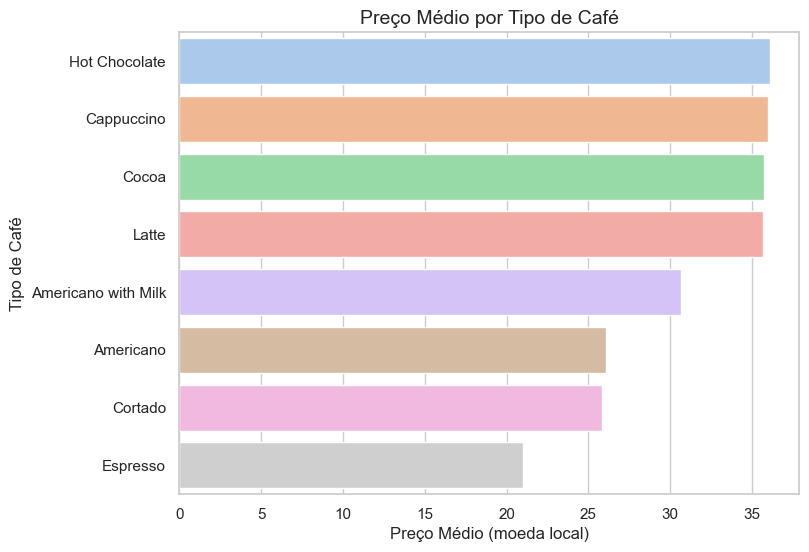

In [37]:
# Calcular o preço médio por tipo de café
preco_medio_por_cafe = df1.groupby('coffee_name')['money'].mean().sort_values(ascending=False)

# Mostrar o resultado
print(preco_medio_por_cafe)

# Visualizar com um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    x=preco_medio_por_cafe.values,     # valores do preço médio
    y=preco_medio_por_cafe.index,      # nomes dos cafés
    palette='pastel',
    hue=preco_medio_por_cafe.index,    # para evitar warning de palette
    legend=False
)
plt.title('Preço Médio por Tipo de Café', fontsize=14)
plt.xlabel('Preço Médio (moeda local)')
plt.ylabel('Tipo de Café')
plt.show()

### Preço Médio por Produto

Para complementar a análise de quantidade e faturamento, calculamos também o preço médio pago por cada tipo de café. Isso ajuda a entender o ticket médio e perceber se produtos com preços mais altos têm volume de vendas menor ou não.

- **Latte** – preço médio de 35,66  
- **Americano with Milk** – preço médio de 30,68  
- **Cappuccino** – preço médio de 36,01  
- **Americano** – preço médio de 26,04  
- **Hot Chocolate** – preço médio de 36,07  
- **Cocoa** – preço médio de 35,66  
- **Cortado** – preço médio de 25,82  
- **Espresso** – preço médio de 21,00  

Percebe-se que produtos como *Hot Chocolate* e *Cappuccino*, embora não estejam entre os top-3 em volume, apresentam ticket médio elevado, contribuindo de forma significativa para o faturamento. Já o *Espresso*, com menor preço médio, pode ser um produto de “porta de entrada” para novos clientes.


In [40]:
## Análise Temporal Diária
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Converter a coluna 'date' (novamente, por segurança) e verificar tipos
df1['date'] = pd.to_datetime(df1['date'])
print(df1.dtypes)  # deve mostrar 'datetime64[ns]' na coluna date

# 2. Agrupar por dia e calcular vendas e faturamento
daily = (
    df1
    .groupby(df1['date'].dt.date)   # agora já funciona
    .agg(
        vendas=('coffee_name', 'count'),
        faturamento=('money', 'sum')
    )
    .reset_index()
)

# 3. Mostrar as primeiras linhas para conferir
print(daily.head())


date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object
         date  vendas  faturamento
0  2024-03-01      11        396.3
1  2024-03-02       7        228.1
2  2024-03-03      10        349.1
3  2024-03-04       4        135.2
4  2024-03-05       9        338.5


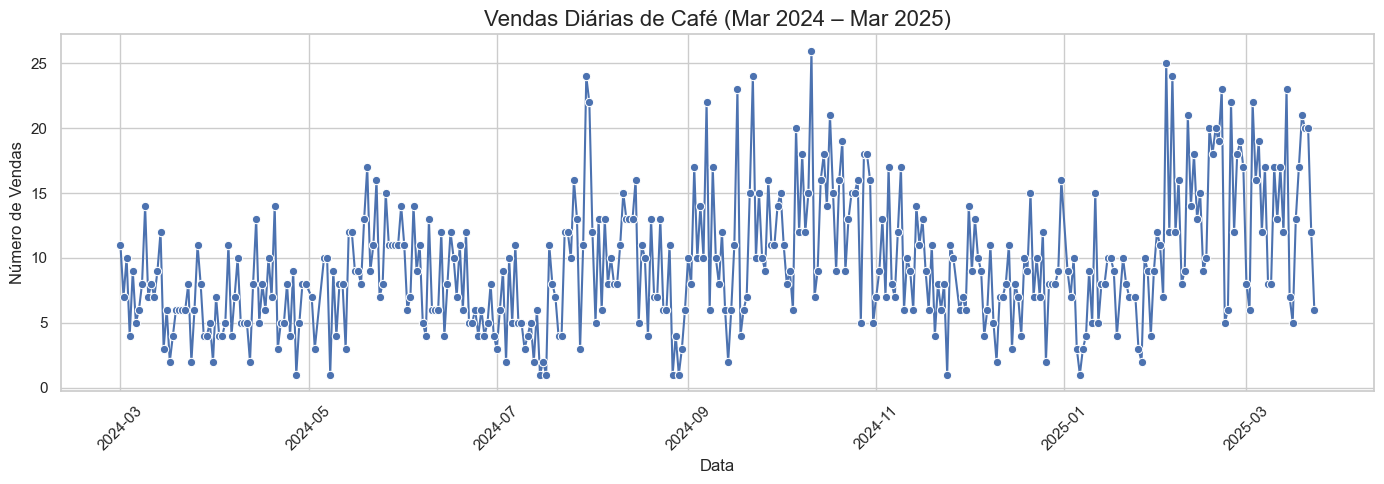

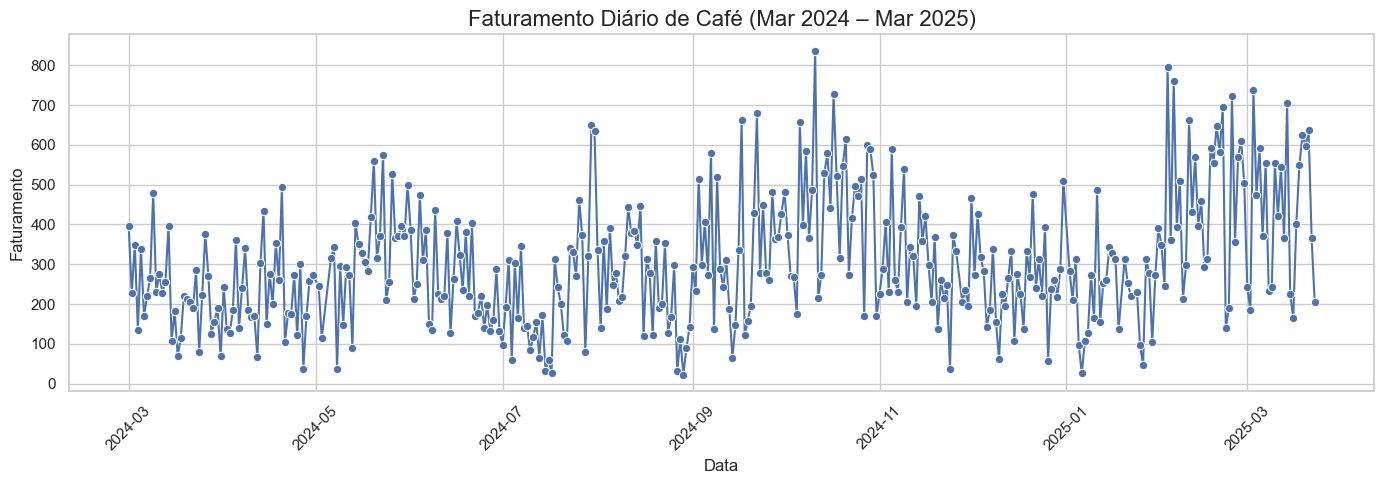

In [41]:
# Plotar vendas diárias
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily, x='date', y='vendas', marker='o')
plt.title('Vendas Diárias de Café (Mar 2024 – Mar 2025)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar faturamento diário
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily, x='date', y='faturamento', marker='o')
plt.title('Faturamento Diário de Café (Mar 2024 – Mar 2025)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análise Temporal de Vendas e Faturamento

Ao olhar os gráficos de séries diárias, percebemos:

- **Tendência de alta** nos últimos meses do período (início de 2025).  
- Um **pico pronunciado** em **outubro de 2024**, sugerindo um evento ou sazonalidade especial nesse mês.  
- **Oscilações diárias** bastante acentuadas, indicando que as vendas e o faturamento variam muito de um dia para o outro, possivelmente por fatores externos (clima, dias da semana, promoções, etc.).

> Esses padrões indicam que, além da tendência geral de crescimento, é interessante investigar se há dias da semana ou meses específicos em que o negócio performa melhor.


In [42]:
## Média de vendas e faturamento por dia da semana
# Criar colunas auxiliares de dia da semana
df1['weekday'] = df1['date'].dt.day_name()  # nomes em inglês; use .day_name(locale='pt_BR') se preferir em português

# Calcular média de vendas e faturamento por dia da semana
weekday_summary = (
    df1
    .groupby('weekday')
    .agg(
        vendas_médias=('coffee_name', 'count'),
        faturamento_médio=('money', 'mean')
    )
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])  # ordena
    .reset_index()
)

# Exibir tabela
weekday_summary

,weekday,vendas_médias,faturamento_médio
0,Monday,561,31.952050
1,Tuesday,585,31.858769
2,Wednesday,510,31.555804
3,Thursday,520,31.687308
4,Friday,544,31.723640
5,Saturday,482,31.499004
6,Sunday,434,31.931014


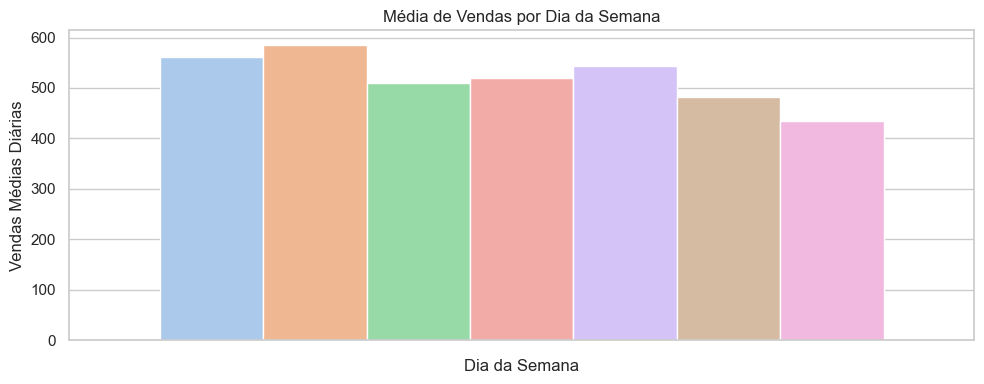

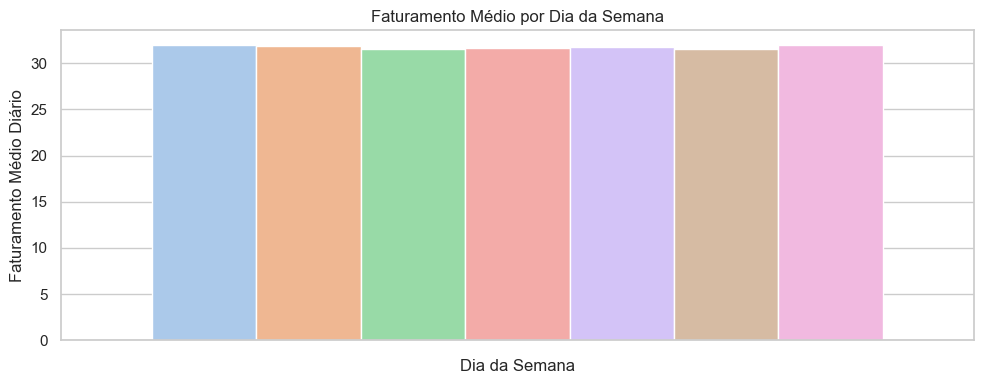

In [44]:
plt.figure(figsize=(10, 4))
sns.barplot(hue='weekday', y='vendas_médias', data=weekday_summary, palette='pastel',legend=False)
plt.title('Média de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas Médias Diárias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(hue='weekday', y='faturamento_médio', data=weekday_summary, palette='pastel',legend=False)
plt.title('Faturamento Médio por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Faturamento Médio Diário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Desempenho por Dia da Semana

Para entender melhor as oscilações diárias, calculamos o total de vendas e o faturamento médio por cada dia da semana:

| Dia da Semana | Vendas Totais | Faturamento Médio (por venda) |
|--------------|---------------|------------------------------|
| Monday       | 561           | 31.95                        |
| Tuesday      | 585           | 31.86                        |
| Wednesday    | 510           | 31.56                        |
| Thursday     | 520           | 31.69                        |
| Friday       | 544           | 31.72                        |
| Saturday     | 482           | 31.50                        |
| Sunday       | 434           | 31.93                        |

**Insights principais:**
- **Terças-feiras** (585 vendas) e **segundas-feiras** (561 vendas) são os dias com maior volume de vendas.
- **Domingos** apresentam o menor volume de vendas (434).
- O **faturamento médio** por venda é bastante estável ao longo da semana (cerca de 31–32 unidades monetárias), mas **domingos** e **segundas** têm os tickets médios um pouco mais altos.

> Esses padrões sugerem que as promoções ou campanhas de fidelização funcionam bem no início da semana, enquanto nos finais de semana a cafeteria pode explorar ofertas especiais para atrair mais clientes.


       month  vendas  faturamento
0 2024-03-01     206      7050.20
1 2024-04-01     196      6720.56
2 2024-05-01     267      9063.42
3 2024-06-01     227      7758.76
4 2024-07-01     237      6915.94


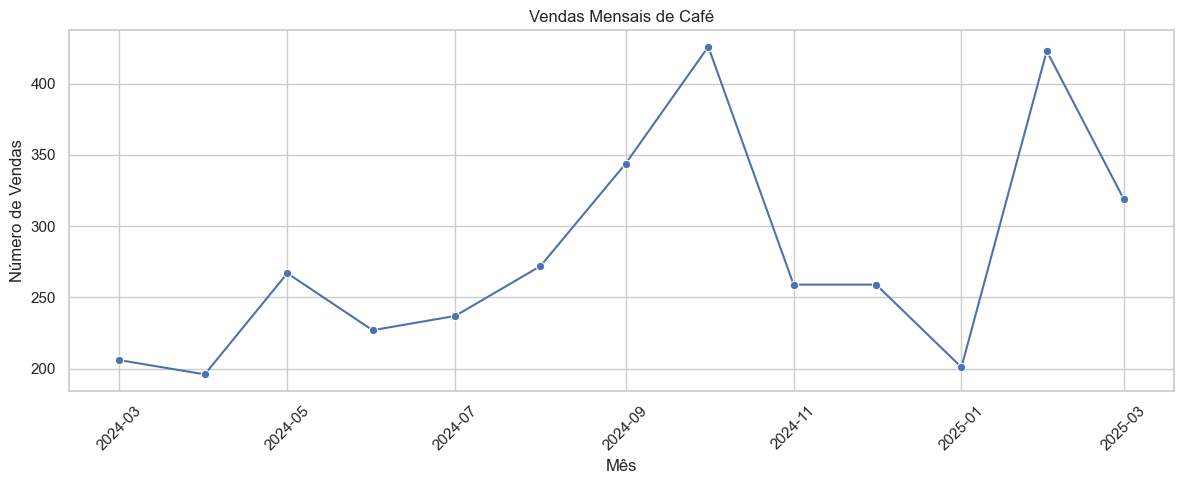

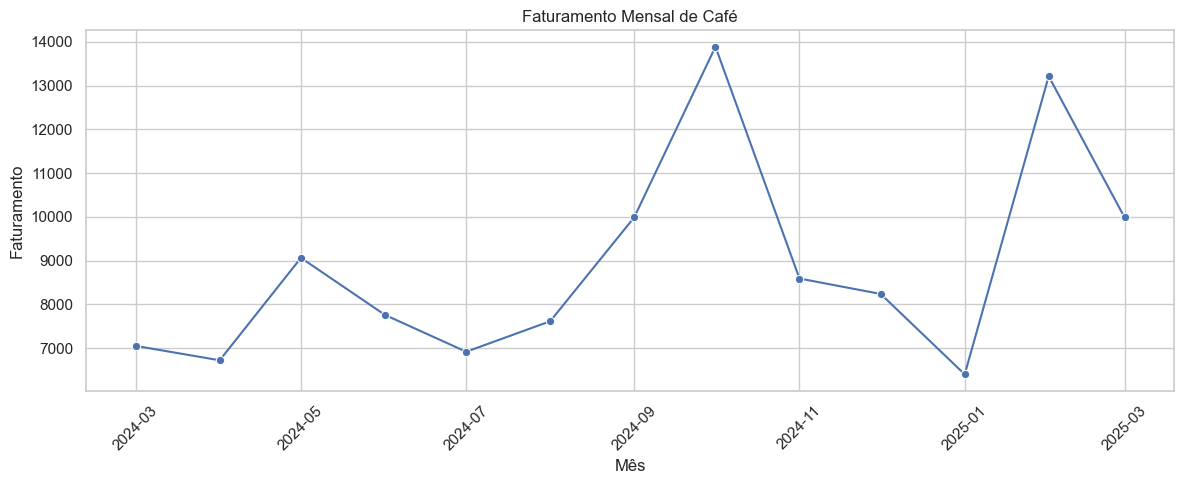

In [45]:
## Agrupar por mês e visualizar vendas e faturamento
# Criar coluna de mês (timestamp no primeiro dia do mês)
df1['month'] = df1['date'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mês
monthly = (
    df1
    .groupby('month')
    .agg(
        vendas=('coffee_name', 'count'),
        faturamento=('money', 'sum')
    )
    .reset_index()
)

# Mostrar as primeiras linhas
print(monthly.head())

# Plotar vendas mensais
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='month', y='vendas', marker='o')
plt.title('Vendas Mensais de Café')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar faturamento mensal
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='month', y='faturamento', marker='o')
plt.title('Faturamento Mensal de Café')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise Mensal de Vendas e Faturamento

A seguir, vemos o comportamento agregado por mês ao longo do período:

- **Pico de vendas em maio de 2024**, com **267 vendas** e faturamento de **R$ 9.063,42**, indicando um ápice de demanda logo no outono.
- **Queda em abril de 2024**, com apenas **196 vendas** (faturamento R$ 6.720,56), possivelmente reflexo de fatores sazonais ou de calendário.
- Após maio, observamos ligeiro declínio em junho (227 vendas) e estabilização em julho (237 vendas, faturamento R$ 6.915,94).
- Nos gráficos completos, há um segundo aumento acentuado em **outubro de 2024**, alinhado ao pico identificado na análise diária.
- Essa variação sugere que promoções ou eventos específicos (feriados, campanhas) podem impulsionar significativamente as vendas em determinados meses.

> **Insight:**  
> - É importante mapear eventos (feriados, festivais, campanhas) que coincidem com esses picos para replicar ou potencializar essas estratégias nos meses de menor movimento.  
> - Nos meses de menor venda (ex.: abril), avaliar promoções de “combo” ou descontos para manter o fluxo de clientes mais estável.

## Conclusão Geral e Recomendações

### Conclusão
Este projeto apresentou uma análise abrangente das vendas de uma cafeteria entre março de 2024 e março de 2025, focando em três dimensões principais:

1. **Análise de Produtos**  
   - *Americano with Milk*, *Latte* e *Americano* são os campeões em volume de vendas e também estão entre os maiores faturamentos.  
   - Produtos como *Cappuccino* e *Hot Chocolate* têm ticket médio elevado, apesar de volume moderado, contribuindo de forma significativa para a receita.  
   - *Espresso* funciona como porta de entrada, com preço médio mais baixo e menor volume.

2. **Análise Temporal**  
   - Observou-se um pico de vendas e faturamento em maio de 2024 e outro em outubro de 2024, indicando impacto de sazonalidades ou eventos especiais.  
   - Houve tendência de alta nos primeiros meses de 2025, sinalizando crescimento contínuo do negócio.  
   - As oscilações diárias e semanais mostram que ter promoções bem alinhadas com dias específicos da semana (por exemplo, terças-feiras, segundas-feiras) pode aumentar ainda mais o fluxo.

3. **Desempenho Semanal e Mensal**  
   - Terças-feiras foram o dia com maior volume de vendas, enquanto domingos registraram o menor movimento.  
   - Os meses de menor venda (abril de 2024, por exemplo) podem se beneficiar de campanhas de incentivo para manter consistência.

### Recomendações
1. **Promoções Sazonais**  
   - Planejar campanhas de marketing em torno de maio e outubro, aproveitando o histórico de picos de vendas (ex.: “Festival do Café” com descontos especiais).  
2. **Ofertas de “Porta de Entrada”**  
   - Destacar o *Espresso* em promoções de baixo custo para atrair novos clientes e incentivá-los a experimentar outras bebidas de maior ticket médio.  
3. **Campanhas Semanais**  
   - Oferecer descontos ou combos às terças-feiras (melhor dia de vendas) e ações especiais para atrair público aos domingos, quando o movimento é menor.  
4. **Análise de Eventos**  
   - Mapear feriados, datas comemorativas e eventos locais para replicar estratégias de sucesso em outros períodos do ano.  
5. **Acompanhamento Contínuo**  
   - Automatizar relatórios mensais para monitorar vendas e faturamento e ajustar rapidamente as ações de marketing.

---

> **Próximos passos**  
> - Integrar dados de custo para calcular margem de lucro por produto.  
> - Analisar perfil de clientes utilizando a coluna `card` para campanhas de fidelização.  
> - Explorar correlações com variáveis externas (clima, eventos) para refinar previsões de demanda.  

Com isso, conclui-se que o entendimento profundo dos padrões de consumo e sazonalidades permite otimizar o mix de produtos e as estratégias de vendas, maximizando receita e engajamento de clientes. 🚀  






